In [1]:
import os,sys,pandas,numpy,seaborn,matplotlib_venn

import sklearn,sklearn.decomposition
import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

In [2]:
def histogrammer(x):

    # get number of bins based on Rice's rule
    rice=int((len(x)**(1/3))*2)
    print('\t number of bins according to Rice: {}'.format(rice))

    counts,edges=numpy.histogram(x,bins=rice)
    half=(edges[1]-edges[0])/2
    centers=edges[:-1]+half

    return centers,counts

# 1. User defined variables

In [3]:
transcriptomics_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/rld_E.csv'
statistics_thp_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/set_E_thp.csv'
statistics_imac_file='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/set_E_imac.csv'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/'

# 2. Read data

## 2.1. Read normalized counts

In [4]:
df=pandas.read_csv(transcriptomics_file,sep=',',index_col=0)
print(df.shape)
df.head()

(11060, 6)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906


## 2.2. Read fold change and significance of THP1

In [5]:
statistics=pandas.read_csv(statistics_thp_file,sep=',',index_col=0)
print(statistics.shape)
print(statistics.head())
df['THP1_significance']=statistics['svalue']
df['log2FoldChange THP']=statistics['log2FoldChange']

print()
print(df.loc[statistics.index[0]])

df.head()

(11060, 4)
                     baseMean  log2FoldChange     lfcSE  svalue
ENSG00000049246   1416.615771       -5.570660  0.332921     0.0
ENSG00000173372   7478.645309       -8.460014  0.547079     0.0
ENSG00000159189  18412.697750      -10.039323  0.991191     0.0
ENSG00000173369   6074.006108       -9.632768  0.697037     0.0
ENSG00000169403   8779.054847       -6.797072  0.565471     0.0

HMDM.1                11.644577
HMDM.2                11.484738
THP1.1                 6.354999
THP1.2                 6.592868
iMac.1                 9.049524
iMac.2                 9.601656
THP1_significance      0.000000
log2FoldChange THP    -5.570660
Name: ENSG00000049246, dtype: float64


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,1.551872e-40,5.757329
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,3.329793e-01,-0.649650
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,3.613763e-01,-0.525258
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,3.593850e-01,0.570576
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,1.693529e-01,0.878974


## 2.3. Read fold change and significance of iMac

In [6]:
statistics=pandas.read_csv(statistics_imac_file,sep=',',index_col=0)
print(statistics.shape)
print(statistics.head())
df['iMac_significance']=statistics['svalue']
df['log2FoldChange iMac']=statistics['log2FoldChange']

print()
print(df.loc[statistics.index[0]])

df.head()

(11060, 4)
                    baseMean  log2FoldChange     lfcSE  svalue
ENSG00000134321   264.696920       -6.521501  0.651158     0.0
ENSG00000152128   281.960617       -5.753847  0.502050     0.0
ENSG00000079308  5354.046527       -5.086966  0.414487     0.0
ENSG00000267034   221.599734       -6.758315  0.671871     0.0
ENSG00000163082  1456.582622       -6.740426  0.365299     0.0

HMDM.1                 9.209040
HMDM.2                 8.628385
THP1.1                 6.425948
THP1.2                 7.063732
iMac.1                 3.936657
iMac.2                 3.878779
THP1_significance      0.000260
log2FoldChange THP    -2.391726
iMac_significance      0.000000
log2FoldChange iMac   -6.521501
Name: ENSG00000134321, dtype: float64


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,1.551872e-40,5.757329,0.000551,1.943823
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,3.329793e-01,-0.649650,0.000004,1.981761
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,3.613763e-01,-0.525258,0.063982,1.153313
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,3.593850e-01,0.570576,0.652135,0.366951
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,1.693529e-01,0.878974,0.772621,0.024399


# 3. Variable exploration

In [7]:
df['HMDM_mean']=df.loc[:,['HMDM.1','HMDM.2']].mean(axis=1)
df['THP1_mean']=df.loc[:,['THP1.1','THP1.2']].mean(axis=1)
df['iMac_mean']=df.loc[:,['iMac.1','iMac.2']].mean(axis=1)
df['Mean']=df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']].mean(axis=1)
df['STD']=df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']].std(axis=1)
df['CV']=df['STD']/df['Mean']
df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,1.551872e-40,5.757329,0.000551,1.943823,8.149312,13.480461,10.031005,10.553592,2.703722,0.256190
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,3.329793e-01,-0.649650,0.000004,1.981761,10.738857,10.092357,12.621880,11.151031,1.314168,0.117852
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,3.613763e-01,-0.525258,0.063982,1.153313,13.347176,12.783117,14.498236,13.542843,0.874141,0.064546
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,3.593850e-01,0.570576,0.652135,0.366951,8.710675,9.246527,9.060165,9.005789,0.272033,0.030206
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,1.693529e-01,0.878974,0.772621,0.024399,11.270209,12.102369,11.293933,11.555503,0.473748,0.040998


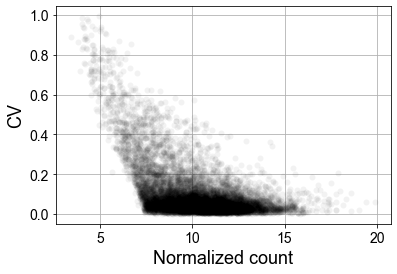

In [8]:
matplotlib.pyplot.plot(df['Mean'],df['CV'],'ok',alpha=0.05,mew=0)
matplotlib.pyplot.xlabel('Normalized count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

# 4. Visualization

In [9]:
df['HMDM_zscore']=(df['HMDM_mean']-df['Mean'])/df['STD']
df['THP1_zscore']=(df['THP1_mean']-df['Mean'])/df['STD']
df['iMac_zscore']=(df['iMac_mean']-df['Mean'])/df['STD']

df.head()

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,1.551872e-40,5.757329,0.000551,1.943823,8.149312,13.480461,10.031005,10.553592,2.703722,0.256190,-0.889249,1.082533,-0.193285
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,3.329793e-01,-0.649650,0.000004,1.981761,10.738857,10.092357,12.621880,11.151031,1.314168,0.117852,-0.313639,-0.805585,1.119224
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,3.613763e-01,-0.525258,0.063982,1.153313,13.347176,12.783117,14.498236,13.542843,0.874141,0.064546,-0.223840,-0.869111,1.092951
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,3.593850e-01,0.570576,0.652135,0.366951,8.710675,9.246527,9.060165,9.005789,0.272033,0.030206,-1.084847,0.884959,0.199888
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,1.693529e-01,0.878974,0.772621,0.024399,11.270209,12.102369,11.293933,11.555503,0.473748,0.040998,-0.602208,1.154339,-0.552131


In [10]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(df.loc[:,['HMDM_zscore','THP1_zscore','iMac_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf

,PC1,PC2
0,-52.010542,-60.779384
1,97.937317,-2.570256
2,-45.926775,63.349641


In [11]:
explained=pca.explained_variance_ratio_
print(explained)

[0.65126959 0.34873041]


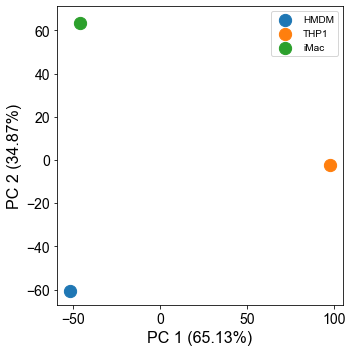

In [12]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP1','iMac']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/pca_all_proteins_E.pdf'.format(results_dir))

(11060, 19)


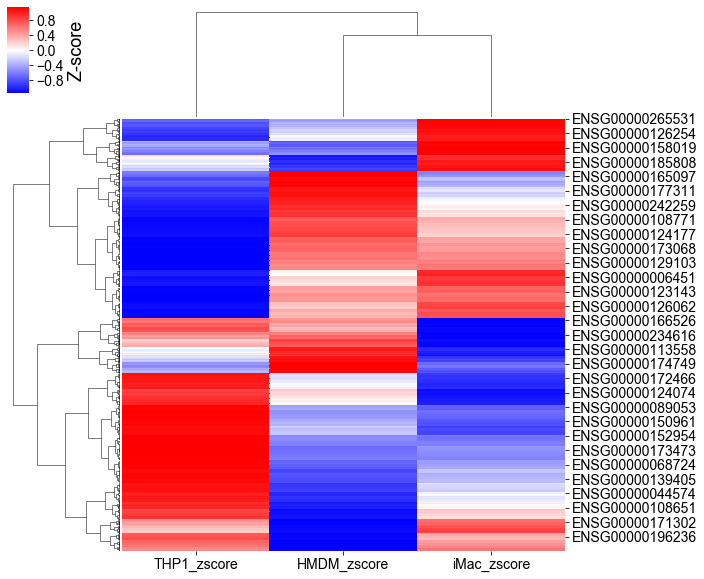

In [13]:
g=seaborn.clustermap(df.loc[:,['HMDM_zscore','THP1_zscore','iMac_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_zscore_E.pdf'.format(results_dir),bbox_inches='tight')
print(df.shape)

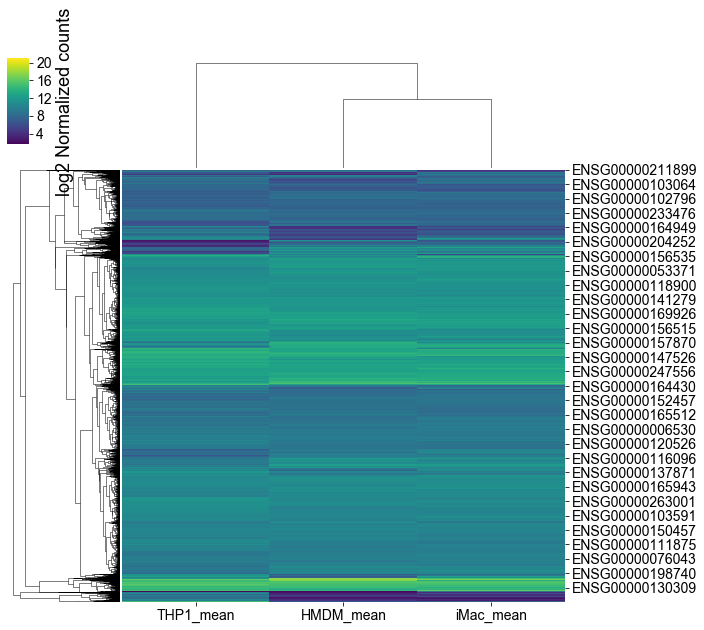

In [14]:
g=seaborn.clustermap(df.loc[:,['HMDM_mean','THP1_mean','iMac_mean']],cmap='viridis',cbar_kws={'label': 'log2 Normalized counts'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_abundance_E.pdf'.format(results_dir),bbox_inches='tight')

# 5. Quantification

## 5.1. Correlation

Text(0.5, 0, 'log2 Normalized count')

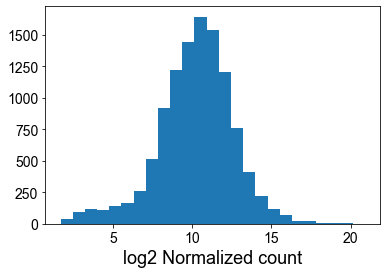

In [15]:
df['HMDM_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

Text(0.5, 0, 'log2 Normalized count')

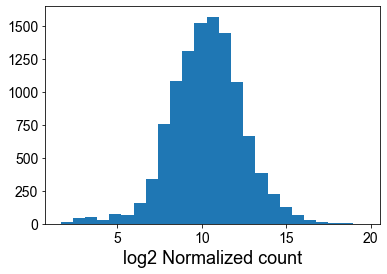

In [16]:
df['THP1_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

Text(0.5, 0, 'log2 Normalized count')

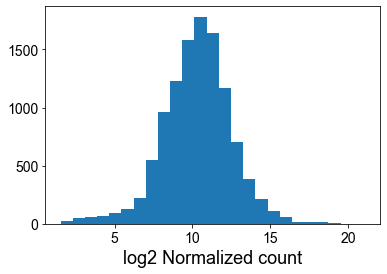

In [17]:
df['iMac_mean'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 Normalized count')

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
HMDM.1,1.000000,0.989656,0.631578,0.620534,0.839784,0.854109
HMDM.2,0.989656,1.000000,0.643393,0.632446,0.860732,0.861942
THP1.1,0.631578,0.643393,1.000000,0.955481,0.681108,0.661656
THP1.2,0.620534,0.632446,0.955481,1.000000,0.666586,0.643384
iMac.1,0.839784,0.860732,0.681108,0.666586,1.000000,0.950923
iMac.2,0.854109,0.861942,0.661656,0.643384,0.950923,1.000000


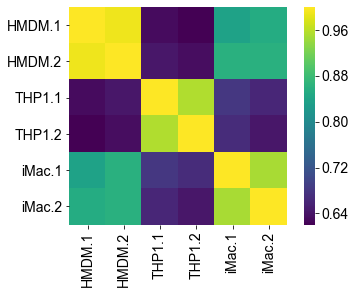

In [18]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
pearson=df.corr(method='pearson').loc[samples,samples]

seaborn.heatmap(pearson,cmap='viridis',square=True)
pearson

,HMDM_mean,THP1_mean,iMac_mean
HMDM_mean,1.000000,0.640673,0.866959
THP1_mean,0.640673,1.000000,0.679064
iMac_mean,0.866959,0.679064,1.000000


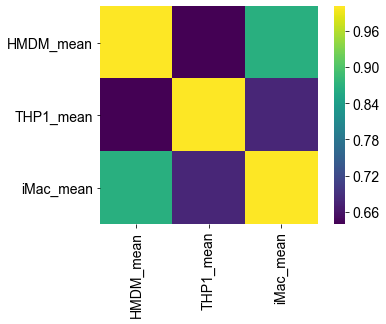

In [19]:
samples=['HMDM_mean','THP1_mean','iMac_mean']
pearson=df.corr(method='pearson').loc[samples,samples]

seaborn.heatmap(pearson,cmap='viridis',square=True)
pearson

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
HMDM.1,1.000000,0.922899,0.562219,0.539928,0.712227,0.740806
HMDM.2,0.922899,1.000000,0.562961,0.543427,0.735059,0.741416
THP1.1,0.562219,0.562961,1.000000,0.823917,0.578960,0.567777
THP1.2,0.539928,0.543427,0.823917,1.000000,0.564197,0.546879
iMac.1,0.712227,0.735059,0.578960,0.564197,1.000000,0.831458
iMac.2,0.740806,0.741416,0.567777,0.546879,0.831458,1.000000


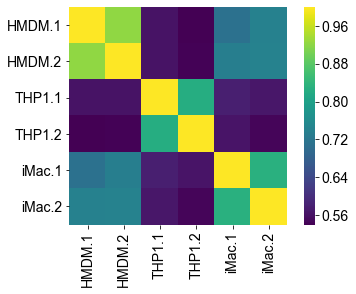

In [20]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
kendall=df.corr(method='kendall').loc[samples,samples]

seaborn.heatmap(kendall,cmap='viridis',square=True)
kendall

,HMDM_mean,THP1_mean,iMac_mean
HMDM_mean,1.000000,0.560751,0.748237
THP1_mean,0.560751,1.000000,0.579329
iMac_mean,0.748237,0.579329,1.000000


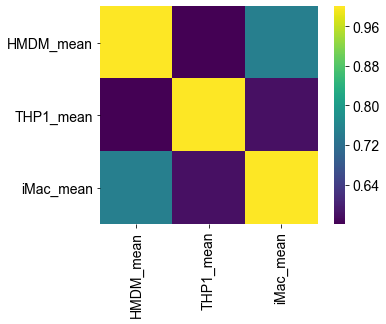

In [21]:
samples=['HMDM_mean','THP1_mean','iMac_mean']
kendall=df.corr(method='kendall').loc[samples,samples]

seaborn.heatmap(kendall,cmap='viridis',square=True)
kendall

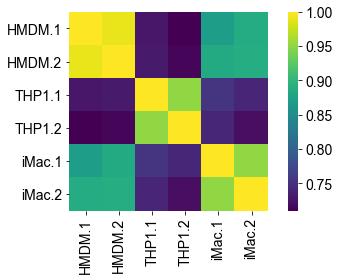

In [22]:
samples=['HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2']
spearman=df.corr(method='spearman').loc[samples,samples]

seaborn.heatmap(spearman,cmap='viridis',square=True)
spearman

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/correlation_spearman_replicates_E.pdf'.format(results_dir))

,iMac_mean,HMDM_mean,THP1_mean
iMac_mean,1.000000,0.895875,0.755744
HMDM_mean,0.895875,1.000000,0.729936
THP1_mean,0.755744,0.729936,1.000000


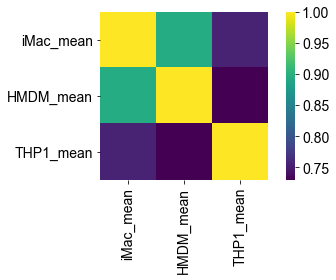

In [23]:
samples=['iMac_mean','HMDM_mean','THP1_mean']
spearman=df.corr(method='spearman').loc[samples,samples]
seaborn.heatmap(spearman,cmap='viridis',square=True)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/correlation_spearman_average_E.pdf'.format(results_dir))
spearman

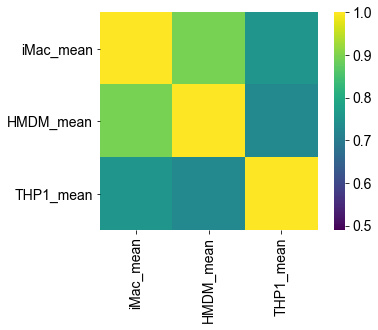

In [24]:
samples=['iMac_mean','HMDM_mean','THP1_mean']
spearman=df.corr(method='spearman').loc[samples,samples]
seaborn.heatmap(spearman,cmap='viridis',square=True,vmin=0.49,vmax=1.0)

In [25]:
# correlation dot plot of changing transcripts

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


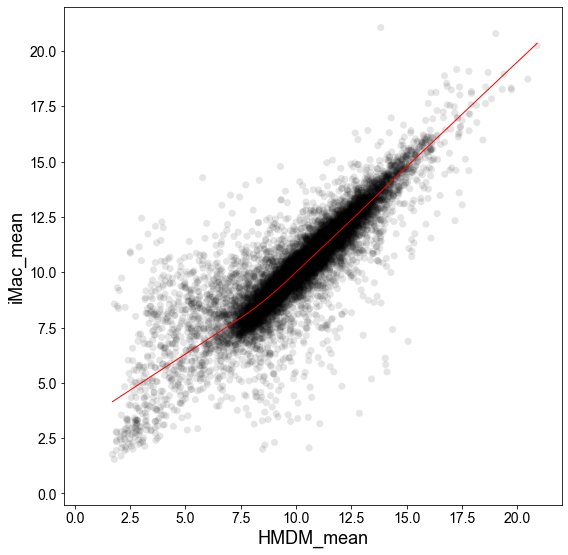

In [26]:
# HMDM - iMAC
matplotlib.pyplot.figure(None,(8,8))
seaborn.regplot(df['HMDM_mean'],df['iMac_mean'],scatter_kws={"s": 50,'color':'black','alpha':0.10,'edgecolors':'none'},line_kws={'color':'red','linewidth':1},truncate=True,lowess=True)

matplotlib.pyplot.xlim(-0.5,22)
matplotlib.pyplot.ylim(-0.5,22)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')

matplotlib.pyplot.savefig('{}/figures/dotplot_imac_E.pdf'.format(results_dir))

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


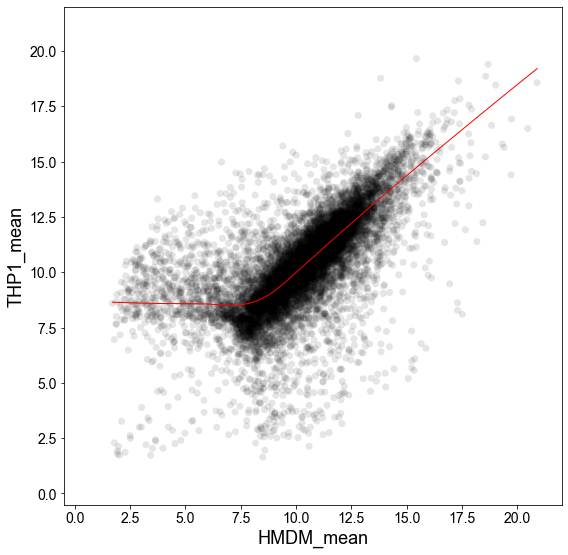

In [27]:
# HMDM - THP
matplotlib.pyplot.figure(None,(8,8))
seaborn.regplot(df['HMDM_mean'],df['THP1_mean'],scatter_kws={"s": 50,'color':'black','alpha':0.10,'edgecolors':'none'},line_kws={'color':'red','linewidth':1},truncate=True,lowess=True)

matplotlib.pyplot.xlim(-0.5,22)
matplotlib.pyplot.ylim(-0.5,22)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')

matplotlib.pyplot.savefig('{}/figures/dotplot_thp_E.pdf'.format(results_dir))

## 5.2. Histogram of fold-change

Text(0.5, 0, 'log2 FC')

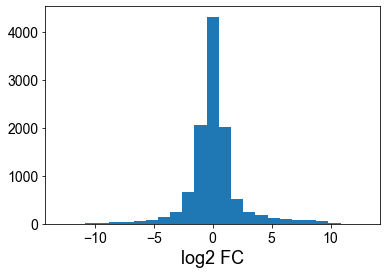

In [28]:
df['log2FoldChange THP'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

Text(0.5, 0, 'log2 FC')

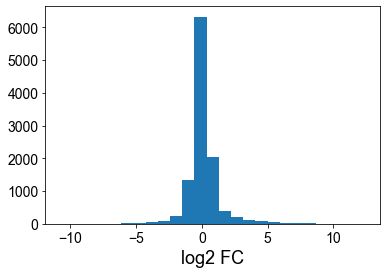

In [29]:
df['log2FoldChange iMac'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

	 number of bins according to Rice: 44
	 number of bins according to Rice: 44


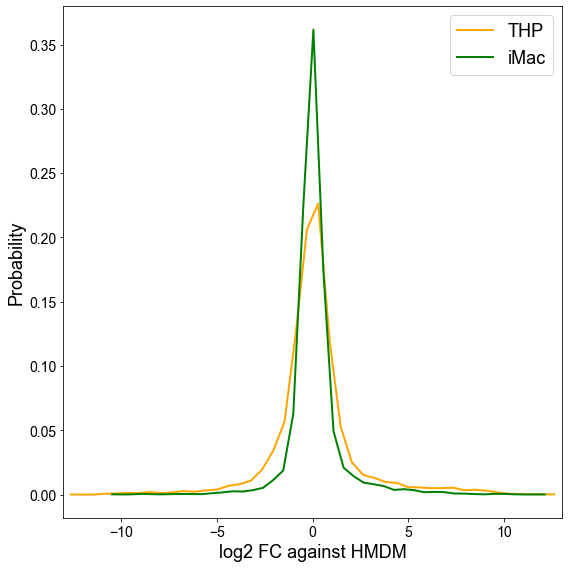

In [30]:
matplotlib.pyplot.figure(None,(8,8))

centersA,counts=histogrammer(df['log2FoldChange THP'].tolist())
matplotlib.pyplot.plot(centersA,counts/sum(counts),'-',color='orange',lw=2,label='THP')

centersB,counts=histogrammer(df['log2FoldChange iMac'].tolist())
matplotlib.pyplot.plot(centersB,counts/sum(counts),'-',color='green',lw=2,label='iMac')

matplotlib.pyplot.xlim(-13,13)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend(fontsize=18)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('{}/figures/FC_PDF_E.pdf'.format(results_dir))

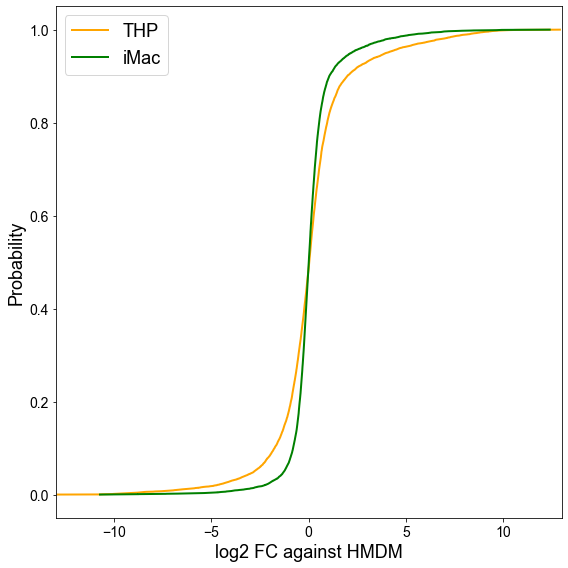

In [31]:
matplotlib.pyplot.figure(None,(8,8))

x=numpy.sort(df['log2FoldChange THP'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='orange',lw=2,label='THP')

x=numpy.sort(df['log2FoldChange iMac'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='green',lw=2,label='iMac')

matplotlib.pyplot.xlim(-13,13)
matplotlib.pyplot.legend()
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend(fontsize=18)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('{}/figures/FC_CDF_E.pdf'.format(results_dir))

In [32]:
# kolmogorov test of fold change
scipy.stats.ks_2samp(df['log2FoldChange THP'].tolist(),df['log2FoldChange iMac'].tolist())

Ks_2sampResult(statistic=0.13254972875226037, pvalue=8.125260053109645e-85)

## 5.3. Dot plot

In [33]:
print(df.shape)
df.head()

(11060, 19)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000225630,8.177918,8.120705,13.057248,13.903673,10.057944,10.004066,1.551872e-40,5.757329,0.000551,1.943823,8.149312,13.480461,10.031005,10.553592,2.703722,0.256190,-0.889249,1.082533,-0.193285
ENSG00000237973,10.685139,10.792575,9.884824,10.299890,12.542713,12.701048,3.329793e-01,-0.649650,0.000004,1.981761,10.738857,10.092357,12.621880,11.151031,1.314168,0.117852,-0.313639,-0.805585,1.119224
ENSG00000248527,13.284513,13.409839,12.477664,13.088571,14.636020,14.360452,3.613763e-01,-0.525258,0.063982,1.153313,13.347176,12.783117,14.498236,13.542843,0.874141,0.064546,-0.223840,-0.869111,1.092951
ENSG00000228794,8.814763,8.606587,9.225290,9.267763,8.901341,9.218989,3.593850e-01,0.570576,0.652135,0.366951,8.710675,9.246527,9.060165,9.005789,0.272033,0.030206,-1.084847,0.884959,0.199888
ENSG00000188976,11.271815,11.268603,11.874815,12.329922,11.327960,11.259906,1.693529e-01,0.878974,0.772621,0.024399,11.270209,12.102369,11.293933,11.555503,0.473748,0.040998,-0.602208,1.154339,-0.552131


THP up: 1835
THP down: 1740
iMac up: 928
iMac down: 549


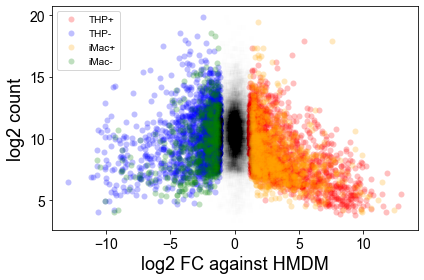

In [34]:
new=df.loc[(df['THP1_significance'] < 0.05) & (df['log2FoldChange THP'] > 1)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='red',label='THP+',alpha=0.25,mew=0)
print('THP up: {}'.format(new.shape[0]))

new=df.loc[(df['THP1_significance'] < 0.05) & (df['log2FoldChange THP'] < -1)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='blue',label='THP-',alpha=0.25,mew=0)
print('THP down: {}'.format(new.shape[0]))

new=df.loc[(df['iMac_significance'] < 0.05) & (df['log2FoldChange iMac'] > 1)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='orange',label='iMac+',alpha=0.25,mew=0)
print('iMac up: {}'.format(new.shape[0]))

new=df.loc[(df['iMac_significance'] < 0.05) & (df['log2FoldChange iMac'] < -1)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='green',label='iMac-',alpha=0.25,mew=0)
print('iMac down: {}'.format(new.shape[0]))

new=df.loc[(df['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(new['log2FoldChange THP'],new['Mean'],'o',color='black',alpha=0.005,mew=0)

new=df.loc[(df['iMac_significance'] > 0.05)]
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['Mean'],'o',color='black',alpha=0.005,mew=0)

matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('log2 count')
matplotlib.pyplot.tight_layout()

## 5.4. Scatter FC

In [35]:
print(df.shape)
thp_genes=df.loc[(df['THP1_significance'] < 0.05)].index.to_list()
print('THP DETs',len(thp_genes))
imac_genes=df.loc[(df['iMac_significance'] < 0.05)].index.to_list()
print('iMac DETs',len(imac_genes))

print()
genes=list(set(thp_genes) | set(imac_genes)) # union
print('intersect DETs',len(genes))

(11060, 19)
THP DETs 3575
iMac DETs 1477

intersect DETs 3998


In [36]:
new=df.loc[genes]
print(new.shape)
new.head()

(3998, 19)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000033170,8.447876,8.844938,11.941893,11.737728,11.188426,10.612078,3.312210e-14,3.405139,0.000002,2.398538,8.646407,11.839810,10.900252,10.462156,1.641159,0.156866,-1.106383,0.839440,0.266943
ENSG00000165757,2.759446,2.692611,9.499150,8.928320,2.736007,3.734218,2.858844e-20,8.370251,0.240870,0.616706,2.726028,9.213735,3.235112,5.058292,3.607710,0.713227,-0.646466,1.151823,-0.505356
ENSG00000162777,11.933093,11.568255,8.545631,8.453762,11.294052,12.567601,3.308110e-08,-3.412482,0.548258,0.249133,11.750674,8.499696,11.930826,10.727065,1.931060,0.180018,0.530076,-1.153444,0.623368
ENSG00000143742,12.672822,12.748924,13.831021,13.837597,12.331432,12.084869,2.281419e-02,1.177855,0.692269,-0.511118,12.710873,13.834309,12.208151,12.917778,0.832589,0.064453,-0.248508,1.100821,-0.852313
ENSG00000215305,10.841221,10.755386,9.106384,9.573985,10.749833,10.560869,3.103675e-03,-1.520129,0.738936,-0.134926,10.798304,9.340184,10.655351,10.264613,0.803763,0.078304,0.663990,-1.150126,0.486136


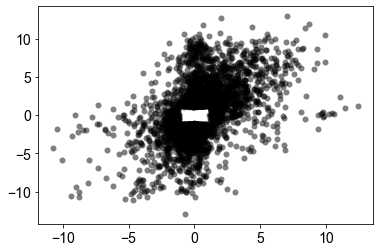

In [37]:
matplotlib.pyplot.plot(new['log2FoldChange iMac'],new['log2FoldChange THP'],'o',color='black',alpha=0.5,mew=0)

iMAC THP
UP UP maroon 624
DOWN DOWN indigo 311
DOWN UP magenta 52
UP DOWN cyan 67
UP — orange 196
DOWN — green 155
— UP red 1024
— DOWN blue 1232
— — black 6377


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


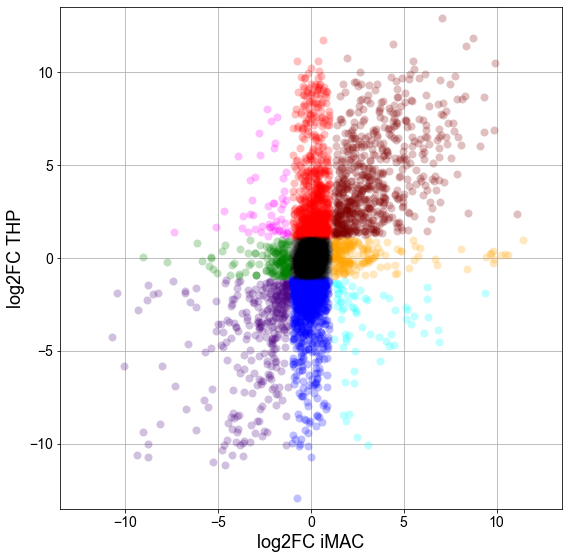

In [38]:
print('iMAC THP')
matplotlib.pyplot.figure(None,(8,8))
the_ms=8

theColor='maroon'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] > 1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP UP',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
maroon_members=x.index.to_list()

theColor='indigo'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] < -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN DOWN',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
indigo_members=x.index.to_list()

theColor='magenta'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] > 1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN UP',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
magenta_members=x.index.to_list()

theColor='cyan'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] < -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP DOWN',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
cyan_members=x.index.to_list()

theColor='orange'
x=new.loc[(new['log2FoldChange iMac'] > 1) & (new['log2FoldChange THP'] < 1) & (new['log2FoldChange THP'] > -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('UP —',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
orange_members=x.index.to_list()

theColor='green'
x=new.loc[(new['log2FoldChange iMac'] < -1) & (new['log2FoldChange THP'] < 1) & (new['log2FoldChange THP'] > -1) & (new['iMac_significance'] < 0.05) & (new['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('DOWN —',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
green_members=x.index.to_list()

theColor='red'
x=new.loc[(new['log2FoldChange THP'] > 1) & (new['log2FoldChange iMac'] < 1) & (new['log2FoldChange iMac'] > -1) & (new['iMac_significance'] > 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('— UP',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
red_members=x.index.to_list()

theColor='blue'
x=new.loc[(new['log2FoldChange THP'] < -1) & (new['log2FoldChange iMac'] < 1) & (new['log2FoldChange iMac'] > -1) & (new['iMac_significance'] > 0.05) & (new['THP1_significance'] < 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)
print('— DOWN',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
blue_members=x.index.to_list()

theColor='black'
x=df.loc[(df['log2FoldChange THP'] < 1) & (df['log2FoldChange THP'] > -1) & (df['log2FoldChange iMac'] < 1) & (df['log2FoldChange iMac'] > -1) & (df['iMac_significance'] > 0.05) & (df['THP1_significance'] > 0.05)]
matplotlib.pyplot.plot(x['log2FoldChange iMac'],x['log2FoldChange THP'],'o',color=theColor,alpha=0.033,mew=0,ms=the_ms)
print('— —',theColor,x.shape[0])
x.to_csv('{}tables/E_{}.txt'.format(results_dir,theColor),sep='\t')
black_members=x.index.to_list()

matplotlib.pyplot.xlabel('log2FC iMAC')
matplotlib.pyplot.ylabel('log2FC THP')

matplotlib.pyplot.grid()
matplotlib.pyplot.xlim(-13.5,13.5)
matplotlib.pyplot.ylim([-13.5,13.5])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')
matplotlib.pyplot.savefig('{}/figures/transcript_trends_E.pdf'.format(results_dir))

In [39]:
maroon=len(maroon_members)
indigo=len(indigo_members)
magenta=len(magenta_members)
cyan=len(cyan_members)
orange=len(orange_members)
green=len(green_members)
red=len(red_members)
blue=len(blue_members)

a=magenta+red+maroon; b=indigo+blue+cyan
print('THP DETs: up, {}; down, {}; total, {}'.format(a,b,a+b))

a=maroon+orange+cyan; b=magenta+green+indigo
print('iMac DETs: up, {}; down, {}; total, {}'.format(a,b,a+b))

print('THP DETs not in iMac: up, {}; down, {}; total, {}'.format(red,blue,red+blue))

print('iMac DETs not in THP: up, {}; down, {}; total, {}'.format(orange,green,orange+green))

ratio=(red+blue)/(orange+green)
print('Ratio DETs THP over DETs iMac: {}'.format(ratio))

THP DETs: up, 1700; down, 1610; total, 3310
iMac DETs: up, 887; down, 518; total, 1405
THP DETs not in iMac: up, 1024; down, 1232; total, 2256
iMac DETs not in THP: up, 196; down, 155; total, 351
Ratio DETs THP over DETs iMac: 6.427350427350428


## 5.5. Heatmap representation

(3998, 19)


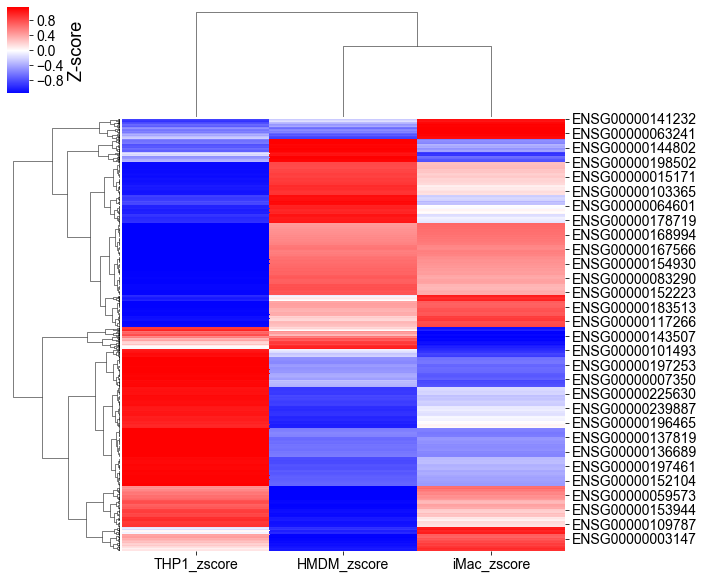

In [40]:
g=seaborn.clustermap(new.loc[:,['HMDM_zscore','THP1_zscore','iMac_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})
print(new.shape)

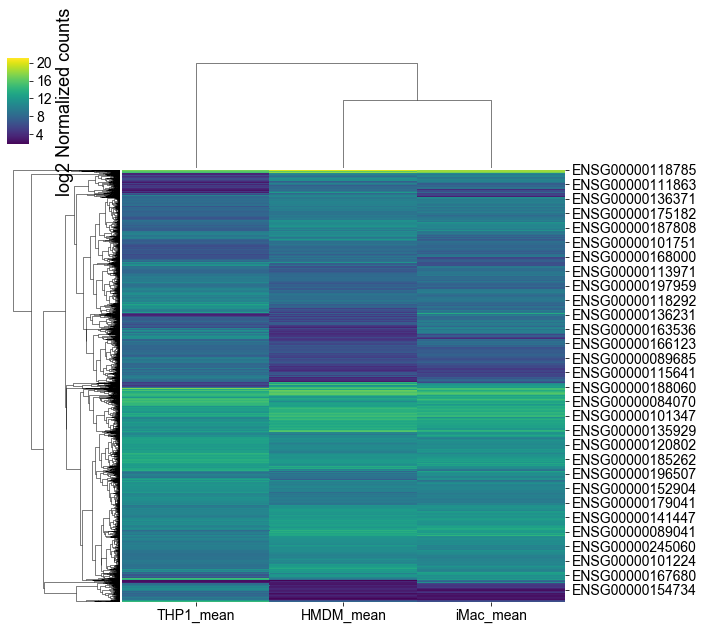

In [41]:
g=seaborn.clustermap(new.loc[:,['HMDM_mean','THP1_mean','iMac_mean']],cmap='viridis',cbar_kws={'label': 'log2 Normalized counts'})

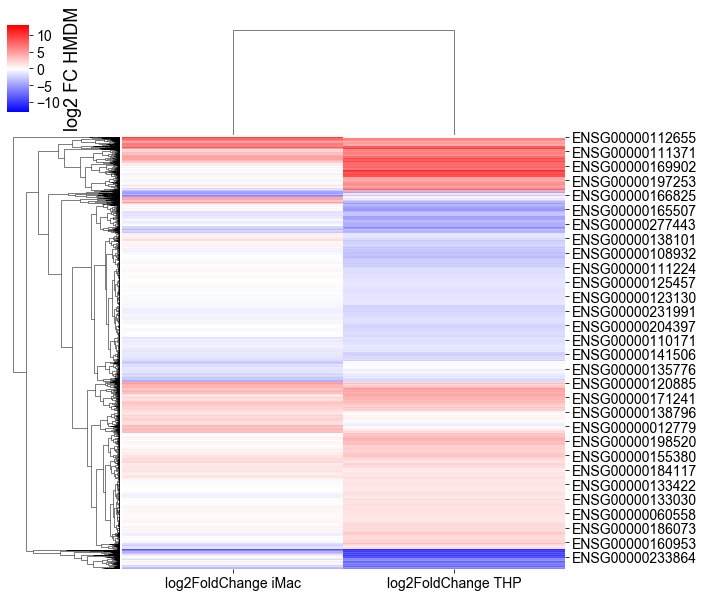

In [42]:
g=seaborn.clustermap(new.loc[:,['log2FoldChange iMac','log2FoldChange THP']],cmap='bwr',cbar_kws={'label': 'log2 FC HMDM'})

## 5.5. Venn diagram

In [43]:
matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

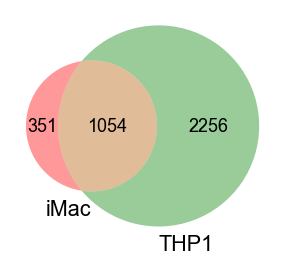

In [44]:
a=orange+green; b=red+blue; c=maroon+cyan+indigo+magenta
matplotlib_venn.venn2(subsets=(a,b,c),set_labels=('iMac','THP1'))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/venn_diagram_E.pdf'.format(results_dir))

## 5.6. Volcano plots

In [45]:
print(new.shape)
new.head()

(3998, 19)


,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2,THP1_significance,log2FoldChange THP,iMac_significance,log2FoldChange iMac,HMDM_mean,THP1_mean,iMac_mean,Mean,STD,CV,HMDM_zscore,THP1_zscore,iMac_zscore
ENSG00000033170,8.447876,8.844938,11.941893,11.737728,11.188426,10.612078,3.312210e-14,3.405139,0.000002,2.398538,8.646407,11.839810,10.900252,10.462156,1.641159,0.156866,-1.106383,0.839440,0.266943
ENSG00000165757,2.759446,2.692611,9.499150,8.928320,2.736007,3.734218,2.858844e-20,8.370251,0.240870,0.616706,2.726028,9.213735,3.235112,5.058292,3.607710,0.713227,-0.646466,1.151823,-0.505356
ENSG00000162777,11.933093,11.568255,8.545631,8.453762,11.294052,12.567601,3.308110e-08,-3.412482,0.548258,0.249133,11.750674,8.499696,11.930826,10.727065,1.931060,0.180018,0.530076,-1.153444,0.623368
ENSG00000143742,12.672822,12.748924,13.831021,13.837597,12.331432,12.084869,2.281419e-02,1.177855,0.692269,-0.511118,12.710873,13.834309,12.208151,12.917778,0.832589,0.064453,-0.248508,1.100821,-0.852313
ENSG00000215305,10.841221,10.755386,9.106384,9.573985,10.749833,10.560869,3.103675e-03,-1.520129,0.738936,-0.134926,10.798304,9.340184,10.655351,10.264613,0.803763,0.078304,0.663990,-1.150126,0.486136


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


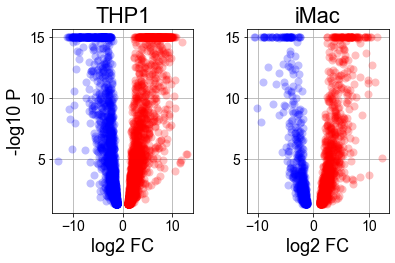

In [46]:
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('-log10 P')
matplotlib.pyplot.xlabel('log2 FC')
matplotlib.pyplot.title('THP1')

theColor='blue'
subset=new.loc[(new['log2FoldChange THP'] < -1) & (new['THP1_significance'] < 0.05)]
x=subset['log2FoldChange THP']
y=-numpy.log10(subset['THP1_significance'])
y[y>15]=15
matplotlib.pyplot.plot(x,y,'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)

theColor='red'
subset=new.loc[(new['log2FoldChange THP'] > 1) & (new['THP1_significance'] < 0.05)]
x=subset['log2FoldChange THP']
y=-numpy.log10(subset['THP1_significance'])
y[y>15]=15
matplotlib.pyplot.plot(x,y,'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)

matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('log2 FC')
matplotlib.pyplot.title('iMac')

theColor='blue'
subset=new.loc[(new['log2FoldChange iMac'] < -1) & (new['iMac_significance'] < 0.05)]
x=subset['log2FoldChange iMac']
y=-numpy.log10(subset['iMac_significance'])
y[y>15]=15
matplotlib.pyplot.plot(x,y,'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)

theColor='red'
subset=new.loc[(new['log2FoldChange iMac'] > 1) & (new['iMac_significance'] < 0.05)]
x=subset['log2FoldChange iMac']
y=-numpy.log10(subset['iMac_significance'])
y[y>15]=15
matplotlib.pyplot.plot(x,y,'o',color=theColor,alpha=0.25,mew=0,ms=the_ms)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/volcano.pdf'.format(results_dir))